<a href="https://colab.research.google.com/github/despanol/Coder/blob/main/ProyectoDSParte1_Salarios_Espa%C3%B1olDavid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAVID ESPAÑOL - Actividad Práctica - Coder House

# ✨ 1.ABSTRACT

El presente análisis utiliza un dataset que recopila información sobre salarios de profesionales del ámbito de ciencia de datos y tecnología. El conjunto de datos incluye variables clave como nivel de experiencia, tipo de contrato, modalidad de trabajo (presencial, híbrido, remoto), ubicación geográfica, categoría del puesto y salario anual expresado en dólares.

La elección de este dataset responde a tres razones fundamentales. Primero, su **pertinencia actual**: el sector de datos es uno de los más dinámicos y con mayor proyección de crecimiento a nivel global. Segundo, la **diversidad de variables** que posee, combinando datos numéricos y categóricos, lo que permite realizar comparaciones y análisis más ricos. Tercero, su **potencial para estudios predictivos** en etapas posteriores, ya que la información recolectada puede alimentar modelos de estimación salarial.

El objetivo principal de este trabajo es **identificar y analizar patrones salariales** para responder preguntas como:

* ¿Existe una relación clara entre experiencia y salario?
* ¿Qué tipos de contrato ofrecen mejores compensaciones?
* ¿Influye la modalidad de trabajo en el nivel de ingresos?
* ¿Cuáles son las categorías laborales más remuneradas?

Para lograrlo, se llevará a cabo un **Análisis Exploratorio de Datos (EDA)** con herramientas como Pandas y NumPy para procesamiento, y Matplotlib y Seaborn para visualización. Se presentarán gráficos enriquecidos con parámetros adicionales (como `hue`, `grid` o estilos personalizados) que permitan una interpretación más intuitiva.

La expectativa es obtener **insights relevantes** que sirvan tanto a profesionales que buscan posicionarse mejor en el mercado laboral como a empresas que desean diseñar políticas de compensación competitivas. Este trabajo servirá como base para un análisis predictivo más avanzado en el futuro.

# ❓2.Preguntas e Hipótesis

**Preguntas de investigación:**

1. ¿El nivel de experiencia está directamente asociado a un mayor salario promedio?
2. ¿El tipo de contrato (tiempo completo, freelance, etc.) influye significativamente en la remuneración?
3. ¿Trabajar de forma remota está vinculado a salarios más altos en comparación con modalidades presenciales?
4. ¿Las posiciones de liderazgo o especialización técnica tienden a tener mejores salarios que los roles operativos o de entrada?
5. ¿La ubicación geográfica de la empresa impacta en la compensación ofrecida?

**Hipótesis:**

* H1: Los salarios aumentan de forma consistente con el nivel de experiencia.
* H2: Los contratos a tiempo completo tienden a ofrecer mejores salarios que las modalidades freelance o por horas.
* H3: La modalidad remota está asociada a salarios más altos debido a la competencia global por talento.
* H4: Los cargos directivos o especializados superan en salario a roles operativos o junior.
* H5: Empresas ubicadas en países con economías más desarrolladas ofrecen mejores compensaciones.

### Librerías que vamos a usar
Estas son las herramientas base y sus funciones principales:

| Librería     | Usos principales                              |
| ------------ | --------------------------------------------- |
| `pandas`     | Lectura, análisis y limpieza de datos.        |
| `numpy`      | Operaciones numéricas y estadísticas básicas. |
| `matplotlib` | Gráficos básicos.                             |
| `seaborn`    | Gráficos avanzados y visualmente atractivos.  |


### Variables interesantes del dataset (salaries_enriched.csv)
Variables más útiles para el modelo y el análisis exploratorio:

| Variable             | Tipo                | Descripción                                         | Relevancia                                            |
| -------------------- | ------------------- | --------------------------------------------------- | ----------------------------------------------------- |
| `experience_level`   | Categórica          | Nivel de experiencia (`EN`, `MI`, `SE`, `EX`)       | Muy útil: está ligado al salario.                     |
| `employment_type`    | Categórica          | Tipo de contrato (`FT`, `PT`, `Contract`, etc.)     | Puede afectar el sueldo.                              |
| `job_title`          | Categórica          | Cargo laboral específico                            | Alto impacto. Hay que agrupar.                        |
| `salary_in_usd`      | Numérica            | Salario anual en USD                                | **Variable objetivo** para predicción.                |
| `employee_residence` | Categórica          | País de residencia del empleado                     | Importante para contexto económico.                   |
| `remote_ratio`       | Numérica            | % de trabajo remoto (0, 50, 100)                    | Puede afectar el salario.                             |
| `company_location`   | Categórica          | País de la empresa                                  | Puede influir si la empresa paga como en EE.UU. o no. |
| `company_size`       | Categórica          | Tamaño de empresa (`S`, `M`, `L`)                   | Sueldos pueden variar según tamaño.                   |
| `job_category`       | Categórica derivada | Agrupación del cargo (analyst, engineer, etc.)      | Útil para reducir categorías.                         |
| `salary_range`       | Categórica derivada | Clasificación del salario (`Low`, `Medium`, `High`) | Útil para un modelo de clasificación.                 |


**# 3.Cargar datos y analizar estructura**

## 2.1. Cargar librerías y archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargo el dataset directamente desde GitHub (link raw)
url = "https://raw.githubusercontent.com/despanol/Coder/refs/heads/main/salaries_enriched.csv"
df = pd.read_csv(url)

# Ver las primeras filas
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_label,is_senior,job_category,salary_k,salary_range,is_remote
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M,Mid-level,False,Analyst,142.000,Medium,False
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M,Mid-level,False,Analyst,87.000,Low,False
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M,Senior,True,Data Quality,218.700,High,False
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M,Senior,True,Data Quality,163.200,High,False
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M,Mid-level,False,Data Quality,121.524,Medium,False


## 2.2. Dimensiones y estructura básica

In [2]:
print("Filas y columnas:", df.shape)
print("\nColumnas disponibles:")
print(df.columns.tolist())

Filas y columnas: (146348, 17)

Columnas disponibles:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'experience_label', 'is_senior', 'job_category', 'salary_k', 'salary_range', 'is_remote']


## 2.3. Tipos de datos y valores faltantes

In [3]:
df.info()

# Ver si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146348 entries, 0 to 146347
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           146348 non-null  int64  
 1   experience_level    146348 non-null  object 
 2   employment_type     146348 non-null  object 
 3   job_title           146348 non-null  object 
 4   salary              146348 non-null  int64  
 5   salary_currency     146348 non-null  object 
 6   salary_in_usd       146348 non-null  int64  
 7   employee_residence  146348 non-null  object 
 8   remote_ratio        146348 non-null  int64  
 9   company_location    146348 non-null  object 
 10  company_size        146348 non-null  object 
 11  experience_label    146348 non-null  object 
 12  is_senior           146348 non-null  bool   
 13  job_category        146348 non-null  object 
 14  salary_k            146348 non-null  float64
 15  salary_range        146348 non-nul

## 2.4. Estadísticas numéricas


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_k
count,146348.000000,1.463480e+05,146348.000000,146348.000000,146348.000000
mean,2024.415646,1.629267e+05,157485.290691,20.901550,162.926672
std,0.674981,2.106091e+05,74134.134223,40.591728,210.609096
min,2020.000000,1.400000e+04,15000.000000,0.000000,14.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000,106.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000,147.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000,199.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000,30400.000000


## 2.5. Estadísticas categóricas

In [5]:
# Frecuencia de niveles de experiencia
print(df['experience_level'].value_counts())

# Tipos de contratos
print(df['employment_type'].value_counts())

# Empresas por tamaño
print(df['company_size'].value_counts())

experience_level
SE    84659
MI    44410
EN    13466
EX     3813
Name: count, dtype: int64
employment_type
FT    145472
CT       449
PT       411
FL        16
Name: count, dtype: int64
company_size
M    142292
L      3839
S       217
Name: count, dtype: int64


## 2.6 Numpy para estadísticas

In [6]:
print("Promedio de salario (USD):", np.mean(df['salary_in_usd']))
print("Mediana:", np.median(df['salary_in_usd']))
print("Desviación estándar:", np.std(df['salary_in_usd']))

Promedio de salario (USD): 157485.29069068248
Mediana: 146100.0
Desviación estándar: 74133.88094181886


# 📊 **3.GRÁFICOS**:

## Graficos con Matplotlib

### 1. 📈 Histograma del salario (en USD)

In [13]:
!pip install mplcursors
#Instalo una herramienta similar a un tooltip

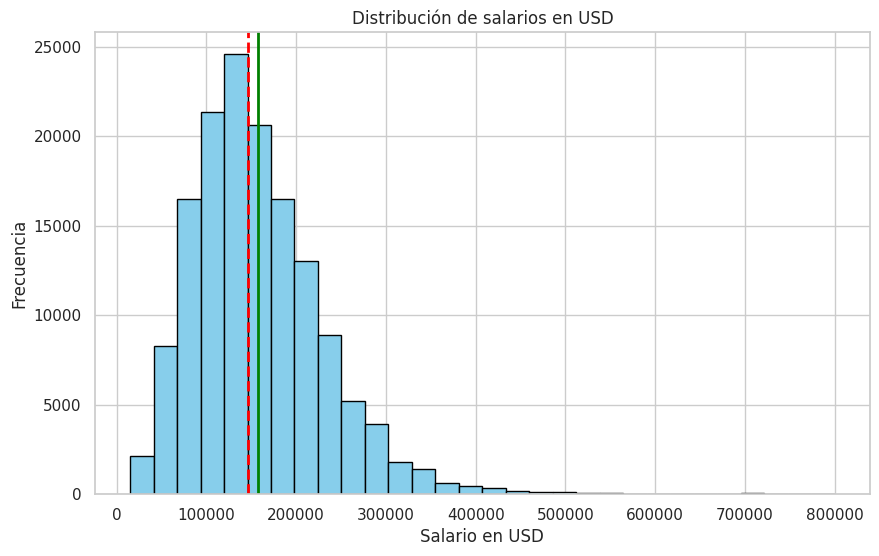

In [17]:
import matplotlib.pyplot as plt
import mplcursors

plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de salarios en USD")
plt.xlabel("Salario en USD")
plt.ylabel("Frecuencia")
plt.grid(True)

# Agrego líneas para identificar Media y Mediana
mean = df['salary_in_usd'].mean()
median = df['salary_in_usd'].median()

plt.axvline(mean, color='green', linestyle='-', linewidth=2, label=f'Media: {mean:.0f} USD')
plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Mediana: {median:.0f} USD')

# Activo el cursor interactivo tipo tooltip
mplcursors.cursor(hover=True)

plt.show()


💡 Insight: La mayoría de los salarios se concentran en el rango medio (entre 80k y 150k USD), lo que sugiere que las posiciones de nivel intermedio dominan el mercado. Solo un pequeño porcentaje accede a salarios superiores a 200k, indicando que los puestos muy bien pagos son excepcionales.

### 2. 📉 Boxplot por experiencia (manual con Matplotlib)

/tmp/ipython-input-2450878198.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=levels, patch_artist=True, showfliers=False) #Quite los Outliers


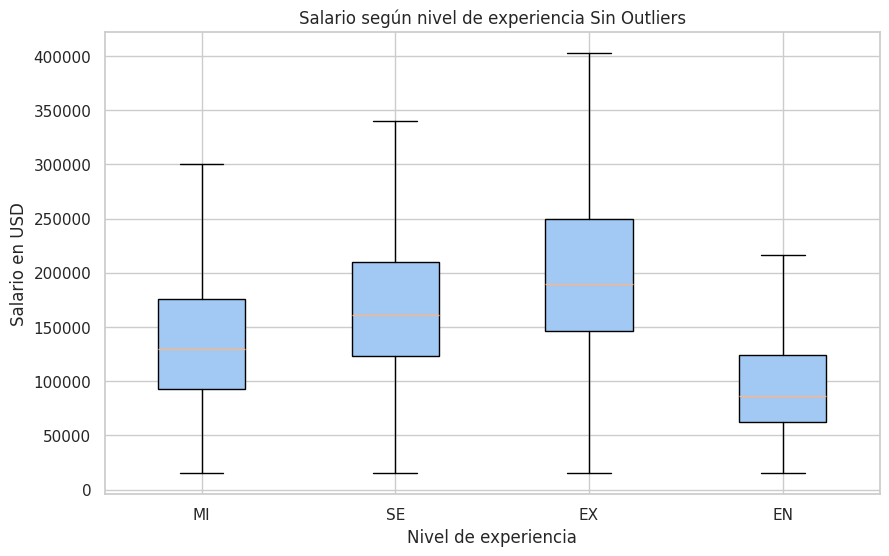

In [20]:
levels = df['experience_level'].unique()
data = [df[df['experience_level'] == lvl]['salary_in_usd'] for lvl in levels]

plt.boxplot(data, labels=levels, patch_artist=True, showfliers=False) #Quite los Outliers
plt.title("Salario según nivel de experiencia Sin Outliers")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")
plt.grid(True)
plt.show()

💡 Insight: A mayor experiencia, mayor salario promedio. Sin embargo, se observan casos de salarios altos incluso en niveles más bajos, lo cual podría deberse a puestos técnicos muy demandados. Esto indica que no solo la experiencia, sino también el rol específico, influye fuertemente en el salario.

### 3. 📊 Barras: cantidad de trabajadores por tamaño de empresa

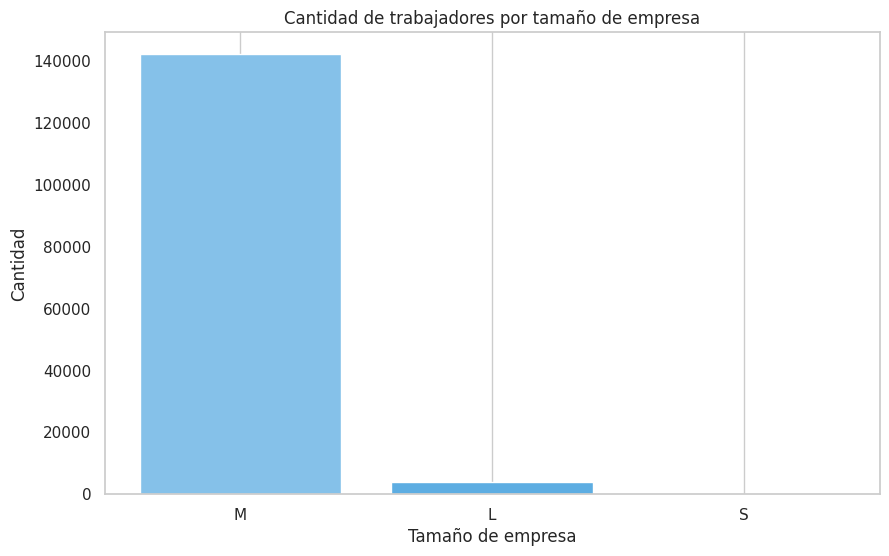

In [ ]:
counts = df['company_size'].value_counts()
plt.bar(counts.index, counts.values, color=['#85C1E9', '#5DADE2', '#2874A6'])
plt.title("Cantidad de trabajadores por tamaño de empresa")
plt.xlabel("Tamaño de empresa")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.show()

💡 Insight:
Los empleados de tiempo completo (FT) tienen los salarios más altos en promedio. Esto muestra que las empresas están dispuestas a pagar más por compromisos laborales de mayor estabilidad y dedicación.

## Gráficos con Seaborn

### 4. 🎨 Boxplot con hue: salario por experiencia y tipo de contrato

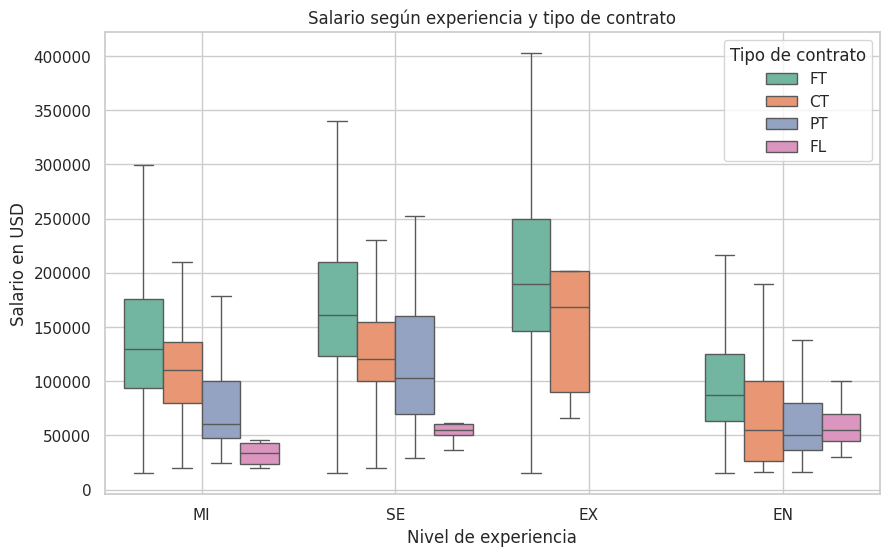

In [21]:
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', hue='employment_type', palette='Set2', showfliers=False)
plt.title("Salario según experiencia y tipo de contrato")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")
plt.grid(True)
plt.legend(title="Tipo de contrato")
plt.show()

💡 Insight:
Los empleados full-time (FT) tienen salarios más altos en todos los niveles.
También se observa que los contratos (CT) y part-time (PT) pagan considerablemente menos.

### 5. 🟠 Barplot: salario promedio por categoría de trabajo

/tmp/ipython-input-4001696055.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='job_category', y='salary_in_usd', palette='rocket')


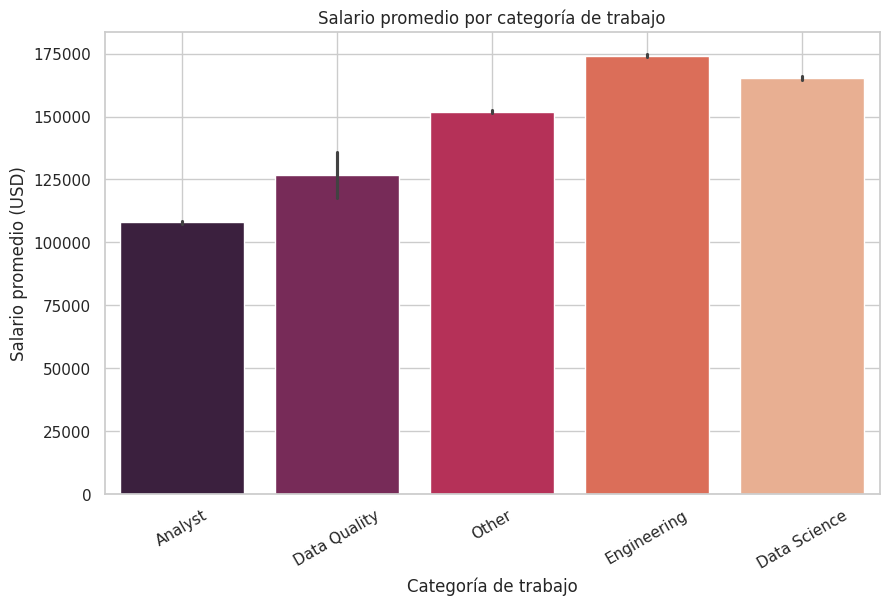

In [22]:
sns.barplot(data=df, x='job_category', y='salary_in_usd', palette='rocket')
plt.title("Salario promedio por categoría de trabajo")
plt.xlabel("Categoría de trabajo")
plt.ylabel("Salario promedio (USD)")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

💡 Insight:
Cargos de tipo Data Science y Engineering tienen salarios más altos, mientras que los roles de Analyst y Data Quality están por debajo del promedio.

### 6. 🧭 Heatmap de correlaciones numéricas

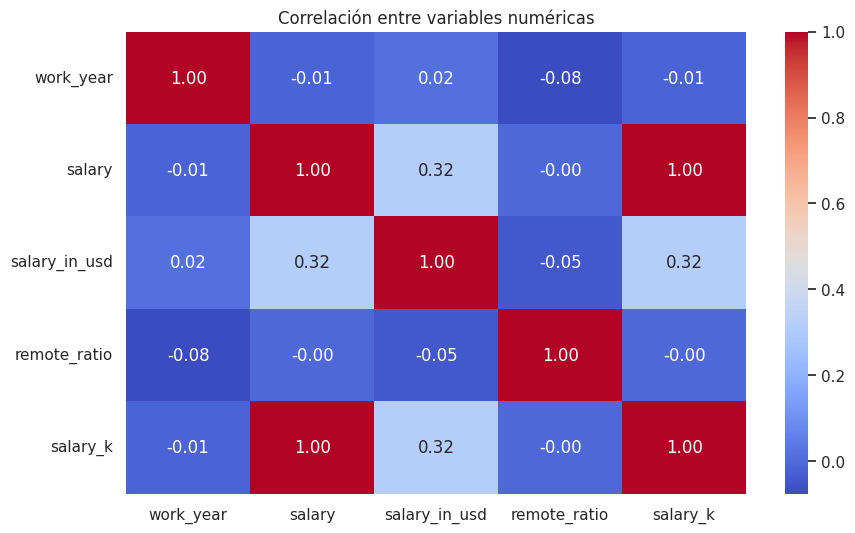

In [23]:
numericas = df.select_dtypes(include='number')
corr = numericas.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()

💡 Insight:
Hay una correlación positiva fuerte entre salary y salary_k (esperable).
remote_ratio tiene una baja correlación directa con el salario, lo que sugiere que trabajar remoto no implica necesariamente ganar más o menos.

## 🧠 CONCLUSIÓN DE INSIGHTS:

La experiencia y el tipo de contrato son factores clave para estimar el salario.

Cargos como Data Scientist o Engineer ganan más que Analyst o roles de calidad.

El tamaño de empresa y el país también aportan contexto importante, pero deben analizarse en combinación con otras variables.

El salario muestra una distribución sesgada hacia valores altos: hay outliers o ejecutivos con sueldos muy superiores.